<a href="https://colab.research.google.com/github/ayuastinaa/FoodCaloriesCounter/blob/main/Penghitung_Kalori_Makanan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.mkdir = ('dataset')
dataset_dir = 'dataset'

In [ ]:
import pandas as pd

# Membaca combined_data.csv
data = pd.read_csv('dataset/combined_data.csv')
print(data.head())

          filename         label  calories
0  nasigoreng.jpeg   nasi_goreng     267.0
1       bihun.jpeg         bihun     192.0
2       telur.jpeg         telur      77.0


In [ ]:
from sklearn.model_selection import train_test_split

# Assume 'features' contains your extracted features and 'calories' is the target variable
X = data[['filename', 'label']]  # Replace with actual feature columns
y = data['calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Misalkan ukuran target gambar adalah 150x150
target_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'dataset',  # Ganti dengan path yang sesuai
    target_size=target_size,
    batch_size=1,
    class_mode='binary',  # Ganti dengan 'categorical' jika multi-kelas
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'dataset',  # Ganti dengan path yang sesuai
    target_size=target_size,
    batch_size=1,
    class_mode='binary',  # Ganti dengan 'categorical' jika multi-kelas
    subset='validation'
)

Found 3 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(1, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Ganti dengan softmax jika multi-kelas
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Ganti loss sesuai dengan task

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
3/3 [==============================] - 2s 33ms/step - loss: 0.0432 - accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 0s 30ms/step - loss: 1.8984e-13 - accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 35ms/step - loss: 1.8717e-16 - accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 24ms/step - loss: 6.3976e-20 - accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 39ms/step - loss: 9.9721e-22 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 37ms/step - loss: 7.0234e-24 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 26ms/step - loss: 5.6645e-26 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 0s 24ms/step - loss: 9.0623e-27 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 0s 30ms/step - loss: 1.0047e-27 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 0s 40ms/step - loss: 1.1778e-28 - accuracy: 

In [ ]:
import os

dataset_path = 'dataset'
if not os.path.exists(dataset_path):
    print(f"Path {dataset_path} tidak ada.")
else:
    for root, dirs, files in os.walk(dataset_path):
        print(f"Direktori: {root}")
        print(f"Subfolder: {dirs}")
        print(f"Files: {files}")

Direktori: dataset
Subfolder: ['images', '.ipynb_checkpoints']
Files: ['data.csv', 'calories.csv', 'combined_data.csv']
Direktori: dataset/images
Subfolder: []
Files: ['telur.jpeg', 'nasigoreng.jpeg', 'bihun.jpeg']
Direktori: dataset/.ipynb_checkpoints
Subfolder: []
Files: []


In [ ]:
image_paths = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

print(f"Jumlah gambar ditemukan: {len(image_paths)}")

Jumlah gambar ditemukan: 3


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 1)       28        
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 1)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5476)              0         
                                                                 
 dense (Dense)               (None, 128)               701056    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 701213 (2.67 MB)
Trainable params: 701213 (2.67 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(1, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
import numpy as np

dummy_x = np.random.random((1, 150, 150, 3))  # Satu gambar dengan ukuran yang sesuai
dummy_y = np.array([1])  # Label dummy

model.predict(dummy_x)  # Cek apakah model dapat memproses data dummy

1/1 [==============================] - 1s 759ms/step


array([[0.32161272, 0.21051131, 0.46787608]], dtype=float32)

In [ ]:
model.compile(
    optimizer='adam',          # Pilih optimizer yang sesuai
    loss='binary_crossentropy',  # Pilih loss function yang sesuai, 'binary_crossentropy' untuk 2 kelas
    metrics=['accuracy']       # Metode evaluasi yang ingin Anda lihat
)

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size
print(f'Steps per epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

Steps per epoch: 3
Validation steps: 0


In [ ]:
# Cek jumlah batch di generator
print(f'Number of validation batches: {len(validation_generator)}')

# Set validation_steps secara manual
validation_steps = max(1, len(validation_generator))
print(f'Validation steps: {validation_steps}')

# Cek beberapa batch dari validation_generator
for data_batch, labels_batch in validation_generator:
    print('Validation batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break

# Mengevaluasi model
try:
    val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_steps)
    print(f'Validation Loss: {val_loss}')
    print(f'Validation Accuracy: {val_accuracy}')
except Exception as e:
    print(f'Error during evaluation: {e}')


Number of validation batches: 0
Validation steps: 1
Validation batch shape: (0, 150, 150, 3)
Labels batch shape: (0,)
Error during evaluation: Asked to retrieve element 0, but the Sequence has length 0


In [ ]:
import pandas as pd

# Periksa kunci yang ada dalam history.history
print("Kunci yang ada dalam history.history:", history.history.keys())

# Buat DataFrame dari history
history_df = pd.DataFrame(history.history)

# Menampilkan tabel training dan validation accuracy
if 'accuracy' in history_df.columns:
    if 'val_accuracy' in history_df.columns:
        print("Training and Validation Accuracy:")
        print(history_df[['accuracy', 'val_accuracy']])
    else:
        print("Validation accuracy tidak tersedia.")
        print("Training Accuracy:")
        print(history_df[['accuracy']])
else:
    print("Training accuracy tidak tersedia.")

print("\nTraining and Validation Loss:")
if 'loss' in history_df.columns:
    if 'val_loss' in history_df.columns:
        print(history_df[['loss', 'val_loss']])
    else:
        print("Validation loss tidak tersedia.")
        print(history_df[['loss']])
else:
    print("Training loss tidak tersedia.")

Kunci yang ada dalam history.history: dict_keys(['loss', 'accuracy'])
Validation accuracy tidak tersedia.
Training Accuracy:
   accuracy
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0

Training and Validation Loss:
Validation loss tidak tersedia.
           loss
0  4.322793e-02
1  1.898388e-13
2  1.871679e-16
3  6.397591e-20
4  9.972100e-22
5  7.023444e-24
6  5.664541e-26
7  9.062341e-27
8  1.004656e-27
9  1.177797e-28


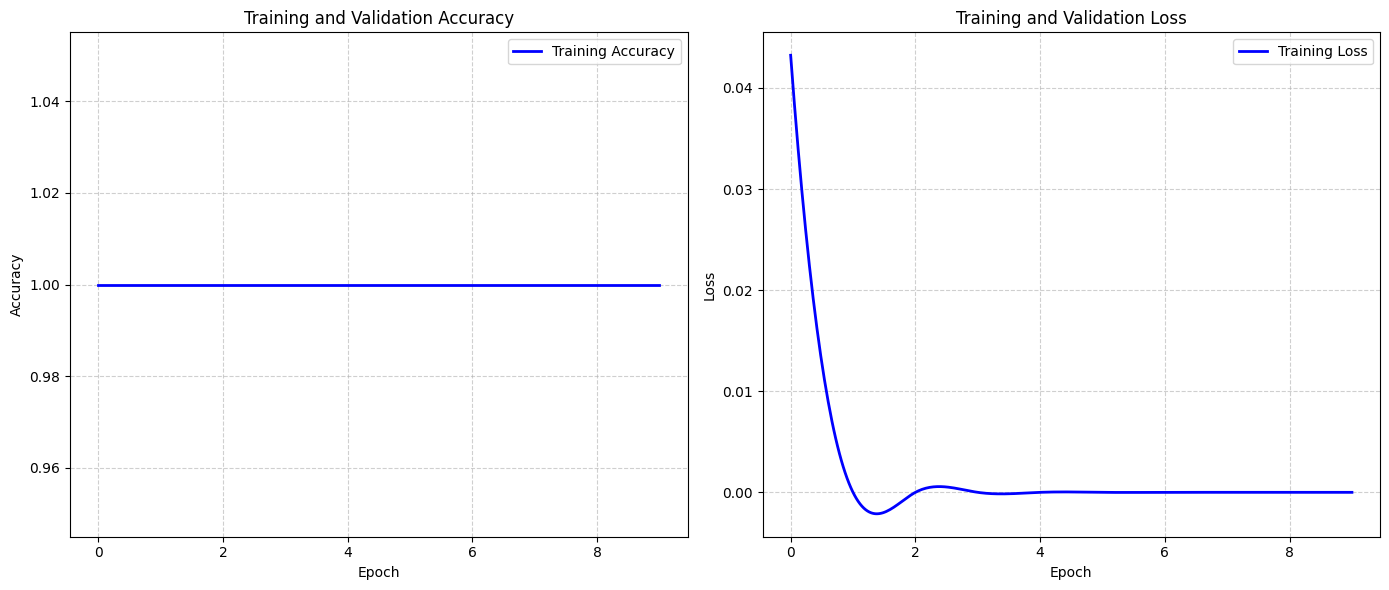

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Fungsi untuk membuat kurva halus
def smooth_curve(y):
    x = np.arange(len(y))
    xnew = np.linspace(x.min(), x.max(), 300)  # Lebih banyak titik untuk interpolasi
    spl = make_interp_spline(x, y, k=3)  # Spline kubik
    return xnew, spl(xnew)

# Buat ukuran gambar dan subplots
plt.figure(figsize=(14, 6))

# Plot akurasi pelatihan dan validasi
plt.subplot(1, 2, 1)
x_acc, y_acc = smooth_curve(history.history['accuracy'])
plt.plot(x_acc, y_acc, label='Training Accuracy', color='blue', linestyle='-', linewidth=2)
if 'val_accuracy' in history.history:
    x_val_acc, y_val_acc = smooth_curve(history.history['val_accuracy'])
    plt.plot(x_val_acc, y_val_acc, label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()  # Menampilkan legend
plt.grid(True, linestyle='--', alpha=0.6)

# Plot loss pelatihan dan validasi
plt.subplot(1, 2, 2)
x_loss, y_loss = smooth_curve(history.history['loss'])
plt.plot(x_loss, y_loss, label='Training Loss', color='blue', linestyle='-', linewidth=2)
if 'val_loss' in history.history:
    x_val_loss, y_val_loss = smooth_curve(history.history['val_loss'])
    plt.plot(x_val_loss, y_val_loss, label='Validation Loss', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()  # Menampilkan legend
plt.grid(True, linestyle='--', alpha=0.6)

# Menyesuaikan tata letak plot
plt.tight_layout()
plt.show()

In [ ]:
model.save('calorie_counter_model.h5')

NameError: name 'model' is not defined

In [ ]:
# Muat model yang sudah dilatih
model = load_model('calorie_counter_model.h5')

NameError: name 'load_model' is not defined

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Muat model yang sudah dilatih
model = load_model('calorie_counter_model.h5')

def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi
    return img_array

def predict_calories(img_path):
    # Sesuaikan target_size dengan ukuran input model Anda
    target_size = (150, 150)
    img_array = preprocess_image(img_path, target_size)
    prediction = model.predict(img_array)

    # Misalkan model menghasilkan kelas atau probabilitas
    predicted_class = np.argmax(prediction, axis=1)

    # Mapping kelas ke nama makanan dan kalori (contoh)
    class_labels = ['nasigoreng', 'bihun', 'telur']
    calorie_map = {'nasigoreng': 267, 'bihun': 192, 'telur': 77}

    predicted_label = class_labels[predicted_class[0]]
    calories = calorie_map.get(predicted_label, 'Unknown')

    return predicted_label, calories

# Contoh penggunaan
img_path = 'dataset/images/nasigoreng.jpeg'
label, calories = predict_calories(img_path)
print(f'Predicted Label: {label}')
print(f'Estimated Calories: {calories}')

Exception: Config option jax_disable_most_optimizations already defined

In [ ]:
!pip install ipywidgets

In [ ]:
# Definisikan class_labels dan calorie_estimates
class_labels = ['nasigoreng', 'bihun', 'telur']  # Sesuaikan dengan kelas yang ada di model Anda
calorie_estimates = {
    'nasigoreng': 267,
    'bihun': 192,
    'telur': 77
}

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import io

In [ ]:
def preprocess_image(img):
    img = img.resize((150, 150))  # Sesuaikan ukuran target
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalisasi
    return img_array

def predict_calories(image):
    # Lakukan preprocessing pada gambar jika diperlukan
    img = image.resize((150, 150))  # Sesuaikan dengan ukuran input model Anda
    img_array = np.array(img) / 255.0  # Normalisasi gambar jika diperlukan
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension

    # Prediksi kelas menggunakan model
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Mendapatkan label dan kalori
    label = class_labels[predicted_class[0]]
    calories = calorie_estimates.get(label, 'Unknown')

    return label, calories

In [ ]:
def on_button_click(b):
    # Ambil file gambar yang diunggah
    uploaded_file = list(upload_widget.value.values())[0]
    img = Image.open(io.BytesIO(uploaded_file['content']))

    # Lakukan prediksi
    label, calories = predict_calories(img)
    print(f'Predicted Label: {label}')
    print(f'Estimated Calories: {calories}')

In [ ]:
upload_widget = widgets.FileUpload(
    accept='image/*',  # Hanya menerima file gambar
    multiple=False  # Hanya satu file gambar yang diunggah
)

button = widgets.Button(description="Predict Calories")

output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        if upload_widget.value:
            # Ambil file gambar yang diunggah
            uploaded_file = list(upload_widget.value.values())[0]
            file_content = uploaded_file['content']

            # Konversi byte stream ke objek gambar
            img = Image.open(io.BytesIO(file_content))

            # Lakukan prediksi
            label, calories = predict_calories(img)
            print(f'Predicted Label: {label}')
            print(f'Estimated Calories: {calories}')

            # Tampilkan gambar
            display(img)
        else:
            print("No image uploaded.")

button.on_click(on_button_click)

# Tampilkan widget
display(upload_widget, button, output)